# Simple Lineal Regression

In this notebook, I will create a simple linear regression model. We will also plot the dependence of the X parameter on the Y parameter and calculate the main metrics

In [1]:
import pandas as pd # data Anasysis 
import numpy as np # mathmatics 
import matplotlib.pyplot as plt # simple graph
from sklearn.linear_model import LinearRegression # all algrithms 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/home/prince/Desktop/projects/machine-learning/data-set-1.csv')

In [3]:
df.tail(10)

,X,Y
290,291,197.222222
291,292,197.888889
292,293,198.555556
293,294,199.222222
294,295,199.888889
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889
299,300,1.888889


In [4]:
df.corr()

,X,Y
X,1.000000,0.959876
Y,0.959876,1.000000


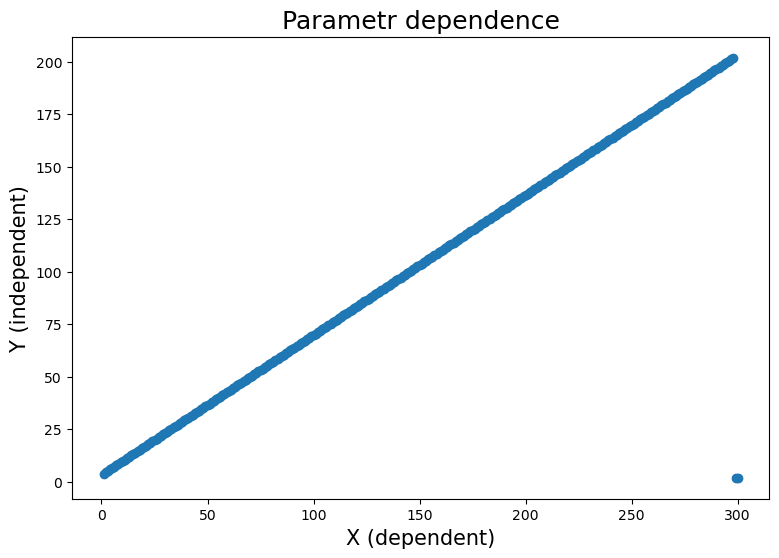

In [5]:
# Let's plot a dependence graph of the parameters
plt.figure(figsize=(9, 6))
X = df['X']
Y = df['Y']
plt.scatter(X, Y)
plt.xlabel('X (dependent)', fontsize=15)
plt.ylabel('Y (independent)', fontsize=15)
plt.title('Parametr dependence', fontsize=18)
plt.show()

In [6]:
# Find the coefficients for the equation y = m + k*x using mathematical calculations
def find_coef(df):
    x_mean = df['X'].mean()
    y_mean = df['Y'].mean()
    k = sum([(x - x_mean) * (y - y_mean) for x, y in list(zip(df['X'], df['Y']))]) / \
    sum([(x - x_mean) ** 2 for x in list(df['X'])])
    m = y_mean - k * x_mean
    return {'x_mean': x_mean, 'y_mean': y_mean, 'k': k, 'm': m}
coefs = find_coef(df)
print(coefs)

{'x_mean': 150.5, 'y_mean': 102.21555556172666, 'k': 0.6400448894359696, 'm': 5.888799701613237}


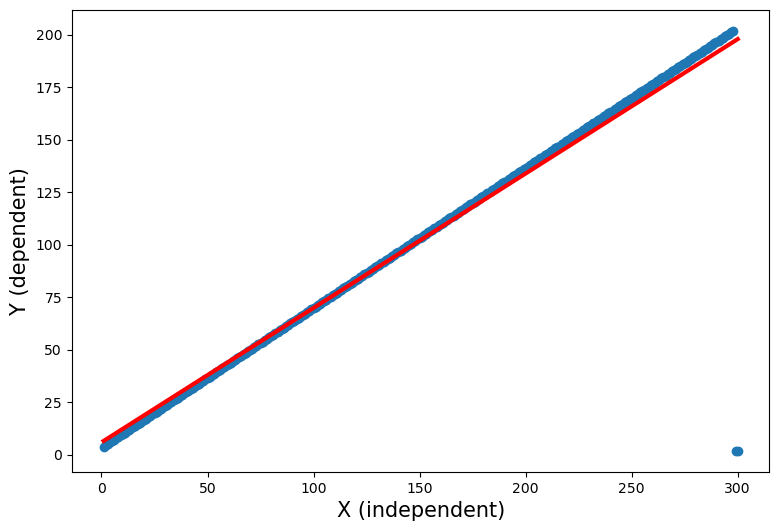

In [7]:
# Let's plot the resulting line
plt.figure(figsize=(9, 6))
X = df['X']
Y = df['Y']
plt.scatter(X, Y)
plt.plot(X, coefs['m'] + coefs['k'] * X, color='red', linewidth=3)
plt.xlabel('X (independent)', fontsize=15)
plt.ylabel('Y (dependent)', fontsize=15)
plt.show()

## First, we will create a model with training and control on the same sample

In [8]:
# Prepare data for a linear regression model
x = df['X'].values
y = df['Y'].values

In [9]:
X_all = x.reshape(-1, 1)
y_all = y

In [10]:
model = LinearRegression()

In [11]:
# Train the model
model.fit(X_all, y)

LinearRegression()

In [12]:
# Predicting Y values
y_predict = model.predict(X_all)

In [13]:
# Compare the value from the data and from the model
y_predict[200], y[200]

(134.53782247824313, 137.2222222)

In [14]:
# Print the main metrics
print(f'R2 Score: {r2_score(y, y_predict)}')
print(f'Root MSE: {np.sqrt(mean_squared_error(y, y_predict))}')
print(f'Coefficients: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

R2 Score: 0.9213615685311795
Root MSE: 16.19351126670784
Coefficients: 0.6400448894359697
Intercept: 5.888799701613223


## Create a model with Train/Test split

In [15]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, train_size=0.8, test_size=0.2, 
                                                    random_state=21, shuffle=True)

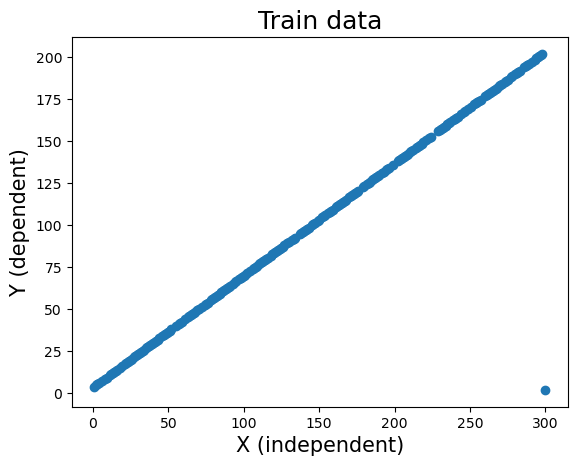

In [16]:
# See sample plots
plt.scatter(X_train, y_train)
plt.title('Train data', fontsize=18)
plt.xlabel('X (independent)', fontsize=15)
plt.ylabel('Y (dependent)', fontsize=15)
plt.show()

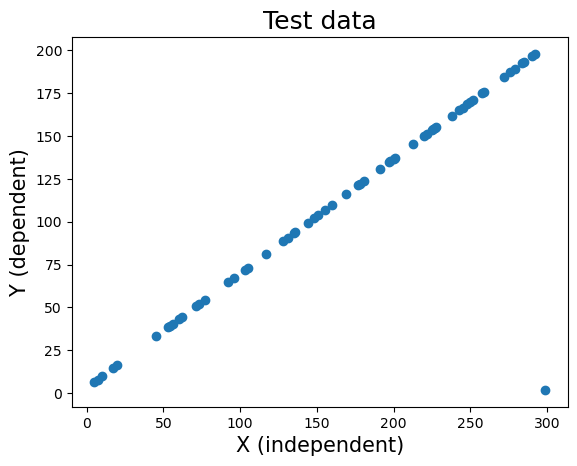

In [17]:
plt.scatter(X_test, y_test)
plt.title('Test data', fontsize=18)
plt.xlabel('X (independent)', fontsize=15)
plt.ylabel('Y (dependent)', fontsize=15)
plt.show()

In [18]:
model_tt = LinearRegression()

In [19]:
# Train the model
model_tt.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predicting Y values
y_predict_tt = model_tt.predict(X_test)

In [21]:
# Compare the value from the data and from the model
y_test[20], y_predict_tt[20]

(196.5555556, 193.24807031691154)

In [22]:
# Ptint the main metrics
print(f'R2 Score: {r2_score(y_test, y_predict_tt)}')
print(f'Root MSE: {np.sqrt(mean_squared_error(y_test, y_predict_tt))}')
print(f'Coefficients: {model_tt.coef_[0]}')
print(f'Intercept: {model_tt.intercept_}')

R2 Score: 0.804926077930459
Root MSE: 25.52447841351079
Coefficients: 0.6494358870752025
Intercept: 4.911663065102786


## In order to improve the metrics of the last model, we will get rid of two questionable values in the dataset.

In [23]:
df.tail(5)

,X,Y
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889
299,300,1.888889


In [24]:
# Delete two last values from dataset, because they seem to be wrong
df = df.drop([298, 299], axis=0)

In [25]:
# Find the coefficients of the linear equation for the updated dataset
find_coef(df)

{'x_mean': 149.5,
 'y_mean': 102.88888889510066,
 'k': 0.6666666667167804,
 'm': 3.222222220941987}

In [26]:
# Preparing the data
X = df['X'].values
y = df['Y'].values
X = X.reshape(-1, 1)

In [27]:
model_tt_2 = LinearRegression()

In [28]:
# Create training and test sets based on updated data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=True)

In [29]:
model_tt_2.fit(X_train_2, y_train_2)

LinearRegression()

In [30]:
# Getting predicted values
y_predict_tt_2 = model_tt_2.predict(X_test_2)

In [31]:
# Print the main metrics
print(f'R2 Score: {r2_score(y_test_2, y_predict_tt_2)}')
print(f'Root MSE: {np.sqrt(mean_squared_error(y_test_2, y_predict_tt_2))}')
print(f'Coefficients: {model_tt_2.coef_[0]}')
print(f'Intercept: {model_tt_2.intercept_}')

R2 Score: 1.0
Root MSE: 1.757193718568e-08
Coefficients: 0.6666666667133846
Intercept: 3.2222222211143645


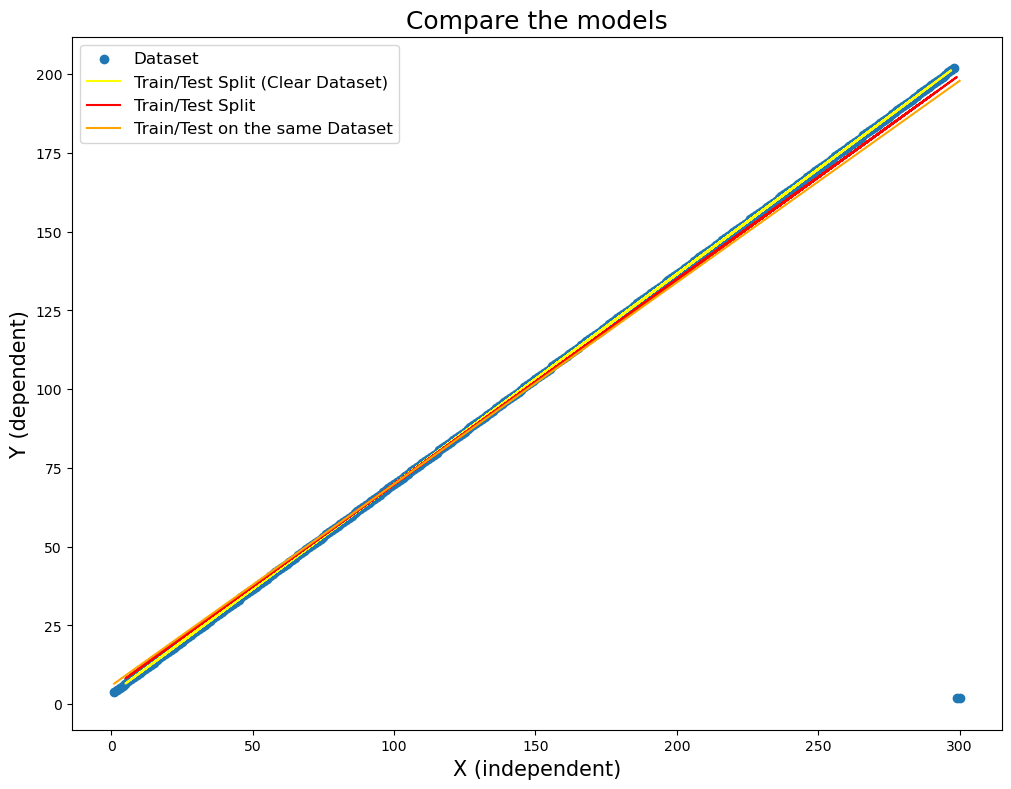

In [32]:
# Let's plot the predicted data for all models and the initial data
plt.figure(figsize=(12, 9))
plt.scatter(X_all, y_all)
plt.plot(X_test_2, y_predict_tt_2, color='yellow')
plt.plot(X_test, y_predict_tt, color='red')
plt.plot(X_all, y_predict, color='orange')
plt.title('Compare the models', fontsize=18)
plt.xlabel('X (independent)', fontsize=15)
plt.ylabel('Y (dependent)', fontsize=15)
plt.legend(['Dataset', 'Train/Test Split (Clear Dataset)', 'Train/Test Split', 'Train/Test on the same Dataset'], fontsize=12)
plt.show()

In [33]:
!jt -t grade3
